In [1]:
import numpy as np 
import pandas as pd
import os, sys
from time import time
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers, callbacks
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Convolution2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import models, layers

Using TensorFlow backend.


In [2]:
folder = r"E:\Capstone - Image docs\Regression with images\Lead\Final - All"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

In [3]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find(".")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 128
image_height = 128
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
   
    
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    
   
print("All images to array!")

Files in train_files: 350
All images to array!


In [4]:
from sklearn.model_selection import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 280, Val set size: 35, Test set size: 35


In [5]:
datagen = ImageDataGenerator(
        rotation_range=90,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(X_train)

val_datagen = ImageDataGenerator(
        rotation_range=90,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen.fit(X_val)

In [6]:
# CNN Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
________________________________________________

In [21]:
from keras import backend as K
def rmse(y_true, y_pred): 
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
    

In [24]:
model.compile(loss=rmse, optimizer='rmsprop', metrics=['mae'])

In [30]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=10), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=200, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=10),
                    nb_val_samples=len(X_val),
                    verbose=1)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., verbose=1, steps_per_epoch=28, epochs=200, validation_steps=35)`
  


Epoch 1/200
28/28 [==============================] - 14s 514ms/step - loss: 8.3679 - mae: 6.4291 - val_loss: 4.5137 - val_mae: 4.4041
Epoch 2/200
28/28 [==============================] - 15s 546ms/step - loss: 8.2356 - mae: 6.1468 - val_loss: 6.1011 - val_mae: 4.6384
Epoch 3/200
28/28 [==============================] - 16s 567ms/step - loss: 7.5911 - mae: 5.8438 - val_loss: 4.9850 - val_mae: 4.3928
Epoch 4/200
28/28 [==============================] - 16s 580ms/step - loss: 8.4195 - mae: 6.6614 - val_loss: 8.8005 - val_mae: 4.4823
Epoch 5/200
28/28 [==============================] - 17s 590ms/step - loss: 8.2346 - mae: 6.3791 - val_loss: 4.0188 - val_mae: 5.1423
Epoch 6/200
28/28 [==============================] - 17s 591ms/step - loss: 8.2759 - mae: 6.4512 - val_loss: 8.9311 - val_mae: 8.0495
Epoch 7/200
28/28 [==============================] - 17s 608ms/step - loss: 8.4924 - mae: 6.5901 - val_loss: 6.7326 - val_mae: 4.4402
Epoch 8/200
28/28 [==============================] - 17s 593ms

Epoch 62/200
28/28 [==============================] - 17s 598ms/step - loss: 8.2768 - mae: 6.2890 - val_loss: 5.3446 - val_mae: 5.3338
Epoch 63/200
28/28 [==============================] - 17s 605ms/step - loss: 7.5274 - mae: 5.9707 - val_loss: 12.1764 - val_mae: 4.8866
Epoch 64/200
28/28 [==============================] - 16s 588ms/step - loss: 6.6628 - mae: 5.2899 - val_loss: 6.0724 - val_mae: 4.7055
Epoch 65/200
28/28 [==============================] - 18s 634ms/step - loss: 7.4500 - mae: 5.8522 - val_loss: 6.7348 - val_mae: 6.6875
Epoch 66/200
28/28 [==============================] - 18s 644ms/step - loss: 7.9337 - mae: 6.0587 - val_loss: 5.2963 - val_mae: 5.2571
Epoch 67/200
28/28 [==============================] - 17s 613ms/step - loss: 7.6449 - mae: 5.9377 - val_loss: 5.4856 - val_mae: 4.5852
Epoch 68/200
28/28 [==============================] - 17s 590ms/step - loss: 7.9280 - mae: 6.3829 - val_loss: 6.5310 - val_mae: 5.0568
Epoch 69/200
28/28 [==============================] - 

28/28 [==============================] - 17s 599ms/step - loss: 6.9293 - mae: 5.3358 - val_loss: 7.5315 - val_mae: 4.0813
Epoch 183/200
28/28 [==============================] - 17s 595ms/step - loss: 7.0905 - mae: 5.5397 - val_loss: 12.4288 - val_mae: 4.8411
Epoch 184/200
28/28 [==============================] - 16s 580ms/step - loss: 7.5336 - mae: 5.5728 - val_loss: 4.2343 - val_mae: 4.0626
Epoch 185/200
28/28 [==============================] - 16s 586ms/step - loss: 7.2932 - mae: 5.5951 - val_loss: 9.0446 - val_mae: 4.7698
Epoch 186/200
28/28 [==============================] - 17s 608ms/step - loss: 7.2613 - mae: 5.6663 - val_loss: 7.2717 - val_mae: 8.0136
Epoch 187/200
28/28 [==============================] - 17s 591ms/step - loss: 7.6065 - mae: 5.7506 - val_loss: 6.8877 - val_mae: 6.5615
Epoch 188/200
28/28 [==============================] - 16s 588ms/step - loss: 7.5557 - mae: 5.5525 - val_loss: 5.7709 - val_mae: 6.3819
Epoch 189/200
28/28 [==============================] - 16s 58

In [31]:

predictions = model.predict(X_test)

In [32]:
print("{0:5} {1:10} {2:8}".format("True", "Predicted", "Error"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10} {2:8}".format(y_test[i], int(predictions[i]), abs(y_test[i] - int(predictions[i]))))
    

True  Predicted  Error   
   44         45        1
   46         43        3
   69         50       19
   29         27        2
   33         35        2
   45         45        0
   65         53       12
   30         29        1
   28         21        7
   29         26        3


In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Given values 
Y_true = [44,46,69,29,33,45,65,30,28,29]  # Y_true = Y (original values) 
  
# calculated values 
Y_pred = [45,43,50,27,35,45,53,29,21,26]  # Y_pred = Y' 
# Calculation of Mean Squared Error (MSE) 
a= sqrt(mean_squared_error(Y_true,Y_pred))
b= mean_absolute_error(Y_true,Y_pred)
print('root_mean_squared_error is : {:.4f}' .format(a))
print('mean_absolute_error is : {:.4f}' .format(b))

root_mean_squared_error is : 7.6289
mean_absolute_error is : 5.0000


In [4]:
# r squared values 
import numpy as np
correlation_matrix = np.corrcoef(Y_true,Y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.8398530460637004


In [5]:
#Feature extraction
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

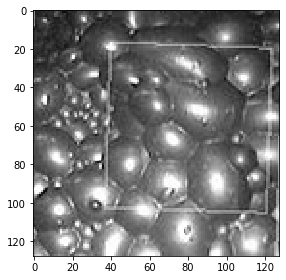

In [6]:
image = imread(r"E:\Capstone - Image docs\Regression with images\Lead\All\19.581.jpg", as_gray=True)
imshow(image)

In [7]:
#checking image shape 
image.shape, image

((128, 128),
 array([[0.55597686, 0.13915176, 0.18423843, ..., 0.52880863, 0.63076941,
         0.56775647],
        [0.56020392, 0.11873333, 0.1352302 , ..., 0.24226627, 0.22714549,
         0.24675333],
        [0.53834118, 0.12460431, 0.11562235, ..., 0.17987137, 0.17987137,
         0.18828   ],
        ...,
        [0.57452902, 0.64877098, 0.64711922, ..., 0.65434431, 0.77534745,
         0.65796824],
        [0.5515651 , 0.68070902, 0.71687412, ..., 0.68515137, 0.81848471,
         0.76777216],
        [0.64736431, 0.80006039, 0.84685137, ..., 0.68515137, 0.84144863,
         0.86916745]]))

 Method 1: Grayscale Pixel Values as Features

In [8]:
import numpy as np
from skimage.io import imread, imshow
image = imread(r'E:\Capstone - Image docs\Regression with images\Lead\All\19.581.jpg', as_gray=True) 

# shape of the image
print('\n\nShape of the image = ',image.shape)

# create features
features = np.reshape(image, (128,128))

# shape of feature array
print('\n\nShape of the feature array = ',features.shape)

print('\n\nFeature Array\n\n',features)



Shape of the image =  (128, 128)


Shape of the feature array =  (128, 128)


Feature Array

 [[0.55597686 0.13915176 0.18423843 ... 0.52880863 0.63076941 0.56775647]
 [0.56020392 0.11873333 0.1352302  ... 0.24226627 0.22714549 0.24675333]
 [0.53834118 0.12460431 0.11562235 ... 0.17987137 0.17987137 0.18828   ]
 ...
 [0.57452902 0.64877098 0.64711922 ... 0.65434431 0.77534745 0.65796824]
 [0.5515651  0.68070902 0.71687412 ... 0.68515137 0.81848471 0.76777216]
 [0.64736431 0.80006039 0.84685137 ... 0.68515137 0.84144863 0.86916745]]


Method 2: Mean Pixel Value of Channels

In [9]:
image = imread(r'E:\Capstone - Image docs\Regression with images\Lead\All\19.581.jpg')
feature_matrix = np.zeros((128,128)) 
feature_matrix.shape

(128, 128)

In [10]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

In [13]:
features = np.reshape(feature_matrix, (128*128)) 
features.shape

(16384,)

In [14]:
# shape of feature array
print('\nShape of the feature array = ',features.shape)
print('\nFeature Array\n',features)


Shape of the feature array =  (16384,)

Feature Array
 [141.33333333  35.66666667  47.66666667 ... 172.         211.33333333
 218.        ]


Method 3: Extracting Edge Features

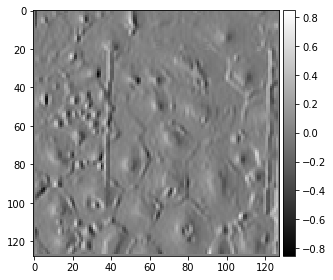

In [19]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
image = imread(r'E:\Capstone - Image docs\Regression with images\Lead\All\19.581.jpg', as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')